In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("t_s1_am_6am.csv")
data

,VV,VH,smap_am,soil_moisture
0,-9.058618,-15.982408,0.284554,0.301
1,-9.511266,-18.085192,0.218601,0.172
2,-10.926619,-19.470199,0.286454,0.485
3,-8.650778,-14.840568,0.407210,0.143
4,-6.633557,-13.470629,0.420252,0.375
...,...,...,...,...
30742,-8.499560,-14.775879,0.210248,0.123
30743,-6.419627,-12.533582,0.335442,0.066
30744,-7.664967,-14.617288,0.225540,0.131
30745,-10.701671,-17.080531,0.089007,0.177


## 1. Missing value imputation

In [4]:
# Find missing data
print(data.isnull().sum())

VV               0
VH               0
smap_am          0
soil_moisture    0
dtype: int64


Since `print(df.isnull().sum())` returned 0, there are no missing values in the dataset.

## 2. Outlier detection

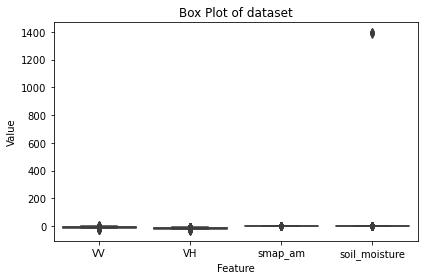

In [5]:
# Create a boxplot using seaborn
sns.boxplot(data=data)

# Set the x and y labels, title, and other common elements
plt.xlabel("Feature")
plt.ylabel("Value")
plt.title("Box Plot of dataset")
plt.tight_layout()

In the following code, the interquartile range (IQR) method is used to identify outliers in the dataset.

The IQR is defined as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. Any data points that fall outside of the range $Q1 - 1.5 \times IQR$ to $Q3 + 1.5 \times IQR$ are considered outliers.


In [6]:
# Find the indices of the outliers using the interquartile range (IQR) method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
outliers

,VV,VH,smap_am,soil_moisture
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
30742,False,False,False,False
30743,False,False,False,False
30744,False,False,False,False
30745,False,False,False,False


In [2]:
(30747-26989)/30747

0.1222233063388298

In [7]:
# Print the total number of outliers found
num_outliers = outliers.sum().sum()
print("Total number of outliers found: ", num_outliers)

# Remove the outliers from the dataframe
data = data[~outliers.any(axis=1)]
data

Total number of outliers found:  4574


,VV,VH,smap_am,soil_moisture
0,-9.058618,-15.982408,0.284554,0.301
1,-9.511266,-18.085192,0.218601,0.172
2,-10.926619,-19.470199,0.286454,0.485
5,-12.483400,-20.180583,0.220504,0.026
6,-10.859593,-17.425397,0.184521,0.165
...,...,...,...,...
30742,-8.499560,-14.775879,0.210248,0.123
30743,-6.419627,-12.533582,0.335442,0.066
30744,-7.664967,-14.617288,0.225540,0.131
30745,-10.701671,-17.080531,0.089007,0.177


## 3. Data Visualization

### 3.1 Correlation Heatmap

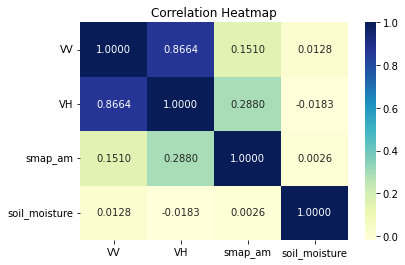

In [8]:
# Calculate correlation matrix
corr = data.corr()

# Plot heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".4f")
plt.title("Correlation Heatmap")
plt.show()

### 3.2 Distribution of Each Variable

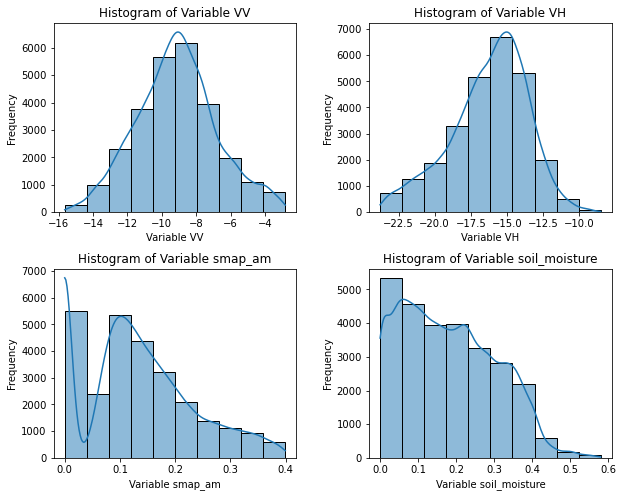

In [9]:
# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the first histogram
sns.histplot(data=data, x='VV', bins=10, kde=True, edgecolor='black', ax=axs[0, 0])
axs[0, 0].set_xlabel('Variable VV')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Histogram of Variable VV')

# Plot the second histogram
sns.histplot(data=data, x='VH', bins=10, kde=True, edgecolor='black', ax=axs[0, 1])
axs[0, 1].set_xlabel('Variable VH')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of Variable VH')

# Plot the third histogram
sns.histplot(data=data, x='smap_am', bins=10, kde=True, edgecolor='black', ax=axs[1, 0])
axs[1, 0].set_xlabel('Variable smap_am')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of Variable smap_am')

# Plot the fourth histogram
sns.histplot(data=data, x='soil_moisture', bins=10, kde=True, edgecolor='black', ax=axs[1, 1])
axs[1, 1].set_xlabel('Variable soil_moisture')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Histogram of Variable soil_moisture')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot
plt.show()

## Normalization and Splitting the data

In [10]:
# Split the data into features (X) and target (y)
X = np.array(data.drop("soil_moisture", axis=1).values)
y = np.array(data["soil_moisture"].values)

print(X)

[[ -9.05861831 -15.98240773   0.28455374]
 [ -9.51126614 -18.0851918    0.21860071]
 [-10.92661881 -19.47019865   0.28645369]
 ...
 [ -7.66496735 -14.61728804   0.22554016]
 [-10.70167104 -17.08053064   0.08900723]
 [-14.91336572 -23.41847055   0.07443891]]


In [11]:
from sklearn.preprocessing import StandardScaler
# Perform standard normalization on the features
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

print(X_norm)

[[ 0.03037076  0.0897548   1.53430982]
 [-0.16155891 -0.69619325  0.8699823 ]
 [-0.76169031 -1.21386098  1.5534476 ]
 ...
 [ 0.6213003   0.59998939  0.93988161]
 [-0.66630898 -0.32068561 -0.43537868]
 [-2.4521326  -2.68958864 -0.58212147]]


In [12]:
from sklearn.model_selection import train_test_split

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (21591, 3)
Shape of X_test: (5398, 3)
Shape of y_train: (21591,)
Shape of y_test: (5398,)


## Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error and r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean squared error:", round(mse,5))
print("R2 Score:", round(r2,5))

Mean squared error: 0.01523
R2 Score: 0.0015


In [14]:
print(f"Intercept: {round(model.intercept_,4)}\nCoefficents: {np.round(model.coef_,4)}")

Intercept: 0.1794
Coefficents: [ 0.0157 -0.0169  0.0029]


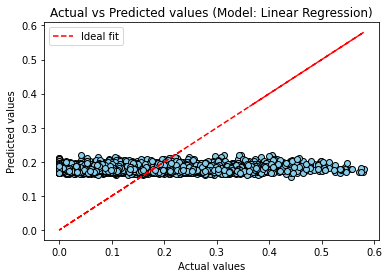

In [16]:
# Create a scatter plot of predicted vs actual values
plt.plot(y_test, y_test, 'r--', label = 'Ideal fit')
plt.scatter(y_test, y_pred, color = 'skyblue', edgecolor = 'k')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values (Model: Linear Regression)")
plt.legend()
plt.show()

## Feed-forward neural network

In [17]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
# Define the model architecture
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=3))  # Hidden layer with 12 neurons
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dense(6, activation='relu'))  # Hidden layer with 6 neurons
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dense(1))  # Output layer with 1 neuron

# Compile the model
model.compile(loss='mean_squared_error', optimizer='sgd')

# Define early stopping callback
early_stop = EarlyStopping(monitor='loss', patience=3, mode='min', verbose=1)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, callbacks=[early_stop])

Epoch 1/10
1350/1350 [==============================] - 2s 916us/step - loss: 0.0447
Epoch 2/10
1350/1350 [==============================] - 1s 890us/step - loss: 0.0176
Epoch 3/10
1350/1350 [==============================] - 1s 871us/step - loss: 0.0161
Epoch 4/10
1350/1350 [==============================] - 1s 880us/step - loss: 0.0156
Epoch 5/10
1350/1350 [==============================] - 1s 897us/step - loss: 0.0153
Epoch 6/10
1350/1350 [==============================] - 1s 914us/step - loss: 0.0152
Epoch 7/10
1350/1350 [==============================] - 1s 906us/step - loss: 0.0152
Epoch 8/10
1350/1350 [==============================] - 1s 871us/step - loss: 0.0150
Epoch 9/10
1350/1350 [==============================] - 1s 934us/step - loss: 0.0149
Epoch 10/10
1350/1350 [==============================] - 1s 954us/step - loss: 0.0149


In [20]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error and r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean squared error:", round(mse,5))
print("R2 Score:", round(r2,5))

Mean squared error: 0.0151
R2 Score: 0.00959


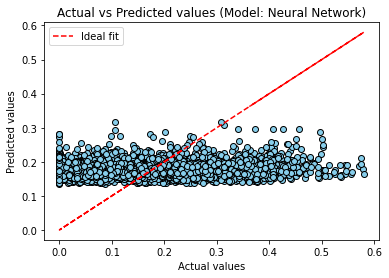

In [21]:
# Create a scatter plot of predicted vs actual values
plt.plot(y_test, y_test, 'r--', label = 'Ideal fit')
plt.scatter(y_test, y_pred, color = 'skyblue', edgecolor = 'k')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values (Model: Neural Network)")
plt.legend()
plt.show()

## Decision tree regression with bagging

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [24]:
# Define the decision tree regressor model
tree_model = DecisionTreeRegressor(random_state=42, min_samples_split=10)

# Define the bagging regressor model with decision tree base estimator
bagging_model = BaggingRegressor(base_estimator=tree_model, n_estimators=50)

# Fit the model to the training data
bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(min_samples_split=10,
                                                      random_state=42),
                 n_estimators=50)

In [25]:
# Make predictions
y_pred = bagging_model.predict(X_test)

# Evaluate the model using mean squared error and r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean squared error:", round(mse,5))
print("R2 Score:", round(r2,5))

Mean squared error: 0.01515
R2 Score: 0.00646


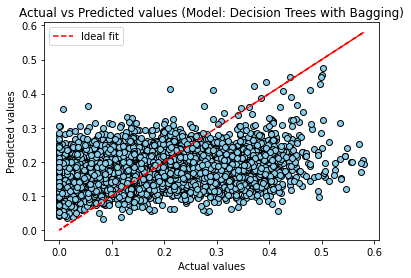

In [26]:
# Create a scatter plot of predicted vs actual values
plt.plot(y_test, y_test, 'r--', label = 'Ideal fit')
plt.scatter(y_test, y_pred, color = 'skyblue', edgecolor = 'k')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values (Model: Decision Trees with Bagging)")
plt.legend()
plt.show()

In [3]:
import numpy as np

In [13]:
arr = np.arange(0,10,0.5)

In [14]:
arr

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [18]:
def sol(arr):
    n = len(arr)
    lst = []
    for i in range(n):
        for j in range(i+1,n):
            if arr[i] + arr[j] == 6:
                lst.append((i,j))
    return lst

In [19]:
sol(arr)

[(0, 12), (1, 11), (2, 10), (3, 9), (4, 8), (5, 7)]

In [20]:
arr[10:15]

array([5. , 5.5, 6. , 6.5, 7. ])